In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap



In [1]:
pip 

Note: you may need to restart the kernel to use updated packages.


ERROR: File "setup.py" not found for legacy project micropython-umqtt.simple from https://files.pythonhosted.org/packages/bd/cf/697e3418b2f44222b3e848078b1e33ee76aedca9b6c2430ca1b1aec1ce1d/micropython-umqtt.simple-1.3.4.tar.gz#sha256=b6a2520239e3992c63a7de9370ee9b3d9d27819a90359c521f1c0f7ccab8d12f.


## Abschlussprojekt <a id=func>

Zunächst werden diverse Hilfsfunktionen definiert, bevor im unteren Bereich die Initialisierung der Petrischale erfolgt, sowie die eigentliche Simulationsdurchführung.
    
Zur besseren Verständlichkeit kann es Sinn machen zunächst den Code zur Petrischale (Anlage der Petrischale) nachzu vollziehen, um das Grundkonzept zu verstehen und sich erst anschliießend mit den Hilfsfunktionen vertraut zu machen.


## Zählfunktion: pop_ent() <a id=func>

Die Funktion pop_ent(array) hat die Aufgabe punktuell die die Bakterien je Bakterien Art zu zählen. Die Idee ist es nach jedem Zeitschritt diese Funktion anzuwenden und in einem Numpy array zu speichern. Später dienen diese Ergebnisse den grafischen Analysen.


In [2]:


def pop_ent(array):
    """
    In der Liste count sollen die Anzahl je Bakterium gespeichert werden.
    Pro Bakterium wird dafür eine Variable mit dem Wert 0 intiallisiert.
    Anschließend wird in einer for Schleife die Petrischale durchlaufen und entsprechend die Variable je Bakterium erhöht
    Zum Schluss werden die Zählstände zusammengefasst
    
    Input:
    -array: numpy array der Petrischale
    
    Output:
    -list, die die drei Werte der Anzahl der Bakterien je Bakterienart
    
    """
    count = []
    count_bac1 = 0
    count_bac2 = 0
    count_bac3 = 0
    for k in np.nditer(array):
        if k == 1:
            count_bac1 += 1
        if k == 2:
            count_bac2 += 1
        if k == 3:
            count_bac3 += 1
    count.append(count_bac1)
    count.append(count_bac2)
    count.append(count_bac3)
        
    return count

## Funktion zur Auswahl eines Bakteriums: auswahl() <a id=func>

Die Funktion wählt zufällig ein Bakterium aus inkl. des Einzugbereiches (die darum liegenden 8 Felder).

In [3]:
def auswahl(array):
    """
    Als erstes werden die einmaligen Werte der Petrischale ausgegeben. 
    Diese werden bereinigt um die Werte der leeren Zellen und des Rand.
    Zunächst wird das numpy array der Petrischale in einer Zeile ausgegeben.
    Dann werden die Indizes der Zellen generiert, die Bakterien enthalten.
    Von diesen Indizes wird zufällig einer ausgewählt.
    Dieser Indize aus der einzeiligen Petrischale wird in die Indizes des eigentlich numpy arrays der Petrischale übersetzt.
    Das Array und die Umliegenden 8 Zellen werden ausgegeben.
    
    Input:
    -array: numpy array der Petrischale
    
    Output:
    -numpy array, welches das Bakterium und die anliegenden Zellen beinhaltet
    
    """
    vorhandene_werte = np.unique(array)
    vorhandene_bakterien = vorhandene_werte[(vorhandene_werte != 9) & (vorhandene_werte != 0)]
    gewaehlte_bakterienart = np.random.choice(vorhandene_bakterien)
    b = np.reshape(array, (1,np.product(array.shape)))
    indices = np.where((b == gewaehlte_bakterienart))[1]
    choice = np.random.choice(indices)
    global zeile
    zeile = choice // breite_und_hoehe
    global spalte
    spalte = choice % breite_und_hoehe
    c = array[zeile-1:zeile+2, spalte-1:spalte+2]
    return c


## Aktionsfunktion: bewegen(), fortpflanzen() und zerstören() <a id=func>

Die Funktionen werden auf das ausgewählte Bakterium und dessen Umkreis angewendet und führen die gewünschte Aktion durch.

In [4]:
def bewegen(array):
    """
    Zunächst wird das numpy array des Bakteriums in einer Zeile ausgegeben.
    Dann werden die Indizes der Zellen generiert, die frei sind.
    Von diesen Indizes wird zufällig einer ausgewählt.
    Diese so indezierte Zelle erhält den Wert des Bakteriums, während die ursprümgliche Zelle des bakteriums leer wird.
    Anschließend wird das array wieder in die Ausgangsform gebracht und zurückgegeben.
    
    Input:
    -array: numpy array des Bakteriums und der angrenzenden Zellen
    
    Output:
    -numpy array, welches das Bakterium und die anliegenden Zellen beinhaltet
    
    """
    b = np.reshape(array, (1,np.product(array.shape)))
    indices = np.where(b == 0)[1]
    choice = np.random.choice(indices)
    b[0][choice] = b[0][4]
    b[0][4] = 0
    array = np.reshape(b,(3,3))
    return array

#Fortpflazungsfunktion

def fortpflanzen(array):
    """
    Zunächst wird das numpy array des Bakteriums in einer Zeile ausgegeben.
    Dann werden die Indizes der Zellen generiert, die frei sind.
    Von diesen Indizes wird zufällig einer ausgewählt.
    Diese so indezierte Zelle erhält den Wert des Bakteriums.
    Anschließend wird das array wieder in die Ausgangsform gebracht und zurückgegeben.
    
    Input:
    -array: numpy array des Bakteriums und der angrenzenden Zellen
    
    Output:
    -numpy array, welches das Bakterium und die anliegenden Zellen beinhaltet
    
    """
    b = np.reshape(array, (1,np.product(array.shape)))
    indices = np.where(b == 0)[1]
    choice = np.random.choice(indices)
    b[0][choice] = b[0][4]
    array = np.reshape(b,(3,3))
    return array

#Zerstörungsfunktion

def zerstören(array):
    """
    Zunächst wird das numpy array des Bakteriums in einer Zeile ausgegeben.
    Dann werden die Indizes der Zellen generiert, die von fremden Bakterien besetzt sind.
    Von diesen Indizes wird zufällig einer ausgewählt.
    Diese so indezierte Zelle erhält den Wert des null.
    Anschließend wird das array wieder in die Ausgangsform gebracht und zurückgegeben.
    
    Input:
    -array: numpy array des Bakteriums und der angrenzenden Zellen
    
    Output:
    -numpy array, welches das Bakterium und die anliegenden Zellen beinhaltet
    
    """
    b = np.reshape(array, (1,np.product(array.shape)))
    indices = np.where((b != 0) & (b != 9) & (b != b[0][4]))[1]
    choice = np.random.choice(indices)
    b[0][choice] = 0
    array = np.reshape(b,(3,3))
    return array



## Aktionsfunktionen zur Zerstörung im Schere-Stein-Papier Fall: zerstörenA(), zerstörenB() und zerstörenC() <a id=func>

Die Funktionen werden auf das ausgewählte Bakterium und dessen Umkreis angewendet und führen die gewünschte Aktion durch.
    
Folgender Maßen sind die zugrunde liegenden Beziehungen Definiert:
    
-Bakterium A zertört Bakterium B
-Bakterium B zertört Bakterium C
-Bakterium C zertört Bakterium A

In [5]:
def zerstörenA(array):
    """
    Zunächst wird das numpy array des Bakteriums in einer Zeile ausgegeben.
    Dann werden die Indizes der Zellen generiert, die von fremden Bakterien besetzt sind.
    Von diesen Indizes wird zufällig einer ausgewählt.
    Diese so indezierte Zelle erhält den Wert des null.
    Anschließend wird das array wieder in die Ausgangsform gebracht und zurückgegeben.
    
    Input:
    -array: numpy array des Bakteriums und der angrenzenden Zellen
    
    Output:
    -numpy array, welches das Bakterium und die anliegenden Zellen beinhaltet
    
    """
    b = np.reshape(array, (1,np.product(array.shape)))
    indices = np.where((b != 0) & (b != 9) & (b != b[0][4]) & (b != 3))[1]
    choice = np.random.choice(indices)
    b[0][choice] = 0
    array = np.reshape(b,(3,3))
    return array



In [6]:
def zerstörenB(array):
    """
    Zunächst wird das numpy array des Bakteriums in einer Zeile ausgegeben.
    Dann werden die Indizes der Zellen generiert, die von fremden Bakterien besetzt sind.
    Von diesen Indizes wird zufällig einer ausgewählt.
    Diese so indezierte Zelle erhält den Wert des null.
    Anschließend wird das array wieder in die Ausgangsform gebracht und zurückgegeben.
    
    Input:
    -array: numpy array des Bakteriums und der angrenzenden Zellen
    
    Output:
    -numpy array, welches das Bakterium und die anliegenden Zellen beinhaltet
    
    """
    b = np.reshape(array, (1,np.product(array.shape)))
    indices = np.where((b != 0) & (b != 9) & (b != b[0][4]) & (b != 1))[1]
    choice = np.random.choice(indices)
    b[0][choice] = 0
    array = np.reshape(b,(3,3))
    return array



In [7]:
def zerstörenC(array):
    """
    Zunächst wird das numpy array des Bakteriums in einer Zeile ausgegeben.
    Dann werden die Indizes der Zellen generiert, die von fremden Bakterien besetzt sind.
    Von diesen Indizes wird zufällig einer ausgewählt.
    Diese so indezierte Zelle erhält den Wert des null.
    Anschließend wird das array wieder in die Ausgangsform gebracht und zurückgegeben.
    
    Input:
    -array: numpy array des Bakteriums und der angrenzenden Zellen
    
    Output:
    -numpy array, welches das Bakterium und die anliegenden Zellen beinhaltet
    
    """
    b = np.reshape(array, (1,np.product(array.shape)))
    indices = np.where((b != 0) & (b != 9) & (b != b[0][4]) & (b != 2))[1]
    choice = np.random.choice(indices)
    b[0][choice] = 0
    array = np.reshape(b,(3,3))
    return array



## Die Hilfsfunktionen freier_platz() und feind() <a id=func>

Die Funktionen sollen prüfen, ob um ein Bakterium freier Platz besteht oder ob ein feindliches Bakterium in der Nähe ist. Später kann so schnell die Auswahl aus den möglichen Aktionen erfolgen.

In [8]:

def freier_platz(array):
    """
    Es wird die bool'sche Variabe "frei" mit False initialisiert.
    anschließend wird sich per for-Schleife durch das Array des bakteriums iteriert.
    Wenn eine Zelle mit dem Wert "0" besetzt ist, springt die Variable frei auf True
    frei ist ebenfalls der Rückgabe Wert der Funktion.
    
    Input:
    -array: numpy array des Bakteriums und der angrenzenden Zellen
    
    Output:
    -Bool'scher Wert der wiedergibt, ob neben dem bakterium eine freie Zelle besteht
    
    """
    frei = False
    for k in np.nditer(array):
        if  k == 0:
            frei = True
    return frei


In [9]:
#Hilfsfunktion zum prüfen, ob neben einer Zelle eine feindliche Zelle vorhanden ist

def feind(array):
    """
    Es wird die bool'sche Variabe "feind" mit False initialisiert.
    Anschließend wird sich per for-Schleife durch das Array des bakteriums iteriert.
    Wenn eine Zelle mit einem feindlichen bakterium besetzt ist, springt die Variable frei auf True
    frei ist ebenfalls der Rückgabe Wert der Funktion.
    
    Input:
    -array: numpy array des Bakteriums und der angrenzenden Zellen
    
    Output:
    -Bool'scher Wert der wiedergibt, ob neben dem bakterium ein feindliches bakterium angrenzt
    
    """
    feind = False
    for k in np.nditer(array):
        if  (k != 0) and (k != 9) and (k!=array[1][1]):
            feind = True
    return feind

## Die Hilfsfunktion feind() für den Schere-Stein-Papier Fall: feindA(), feindB() und feindC() <a id=func>

Die Funktion soll prüfen, ob um ein Bakterium ein feindliches, zerstörbares Bakterium in der Nähe ist. Später kann so schnell die Auswahl aus den möglichen Aktionen erfolgen.
    
Folgender Maßen sind die zugrunde liegenden Beziehungen Definiert:
    
-Bakterium A zertört Bakterium B
-Bakterium B zertört Bakterium C
-Bakterium C zertört Bakterium A

In [10]:
def feindA(array):
    """
    Es wird die bool'sche Variabe "feind" mit False initialisiert.
    Anschließend wird sich per for-Schleife durch das Array des bakteriums iteriert.
    Wenn eine Zelle mit einem feindlichen bakterium besetzt ist, springt die Variable frei auf True
    frei ist ebenfalls der Rückgabe Wert der Funktion.
    
    Input:
    -array: numpy array des Bakteriums und der angrenzenden Zellen
    
    Output:
    -Bool'scher Wert der wiedergibt, ob neben dem bakterium ein feindliches bakterium angrenzt
    
    """
    feind = False
    for k in np.nditer(array):
        if  (k == 2):
            feind = True
    return feind

In [11]:
def feindB(array):
    """
    Es wird die bool'sche Variabe "feind" mit False initialisiert.
    Anschließend wird sich per for-Schleife durch das Array des bakteriums iteriert.
    Wenn eine Zelle mit einem feindlichen bakterium besetzt ist, springt die Variable frei auf True
    frei ist ebenfalls der Rückgabe Wert der Funktion.
    
    Input:
    -array: numpy array des Bakteriums und der angrenzenden Zellen
    
    Output:
    -Bool'scher Wert der wiedergibt, ob neben dem bakterium ein feindliches bakterium angrenzt
    
    """
    feind = False
    for k in np.nditer(array):
        if  (k == 3):
            feind = True
    return feind

In [12]:
def feindC(array):
    """
    Es wird die bool'sche Variabe "feind" mit False initialisiert.
    Anschließend wird sich per for-Schleife durch das Array des bakteriums iteriert.
    Wenn eine Zelle mit einem feindlichen bakterium besetzt ist, springt die Variable frei auf True
    frei ist ebenfalls der Rückgabe Wert der Funktion.
    
    Input:
    -array: numpy array des Bakteriums und der angrenzenden Zellen
    
    Output:
    -Bool'scher Wert der wiedergibt, ob neben dem bakterium ein feindliches bakterium angrenzt
    
    """
    feind = False
    for k in np.nditer(array):
        if  (k == 1):
            feind = True
    return feind

## Die Funktion zur Durchführung eines Zeitschrittes: zeitschritt() <a id=func>

Die Funktion wählt in Bakterium aus der Petrischale aus und führt die entsprechende Aktion durch.

In [14]:
def zeitschritt(array):
    """
    Argument der Funktion soll das array der Petrischale sein.
    Aus dem array der Petrischale wird zunächst per asuwahl() ein Bakterium ausgewählt.
    Anschließend wird geprüft welches Bakterium ausgewählt wurde, um so basierend darauf die Wahrscheinlichkeitsverteilung auszuwählen.
    Danach wird per freier_platz() und feind() geprüft welche Aktionen überhaupt ausführbar sind.
    Zufällig wird dann auf Basis der Wahrscheinlichkeiten eine Aktion durchgeführt.
    Abschließend wird das array des Bakteriums wieder in das array der Petrischale eingefügt
    Das array der Petrischale wird zurückgegeben.
    
    Input:
    -array: numpy array der Petrischale
    
    Output:
    -numpy array der Petrischale
    
    zusätzliche Information:
    -prob1,prob2,prob3 sind Listen, die die drei Wahrscheinlichkeiten beinhalten
    -aktionen und aktionen2 sind zwei Listen, die die wählbaren Aktionen beinhalten
    -alle 5 Listen werden zu einem späteren Zeitpunkt initialisiert
    
    """

    bakterium = auswahl(array)
    

    if bakterium[1][1] == 1:
        prob = prob1
    elif bakterium[1][1] == 2:
        prob = prob2
    else:
        prob = prob3
    
    if (freier_platz(bakterium)) == True and (feind(bakterium) == True):
        aktion = np.random.choice(aktionen, p=prob)
        if aktion == "Bewegen":
            bakterium = bewegen(bakterium)
        elif aktion == "Fortpflanzen":
            bakterium = fortpflanzen(bakterium)
        else:
            bakterium = zerstören(bakterium)
        
    elif freier_platz(bakterium) == True:
        prob = [prob[1]/(prob[1]+prob[2]),prob[2]/(prob[1]+prob[2])]
        aktion = np.random.choice(aktionen2, p=prob)
        if aktion == "Bewegen":
            bakterium = bewegen(bakterium)
        else:
            bakterium = fortpflanzen(bakterium)
    
    elif feind(bakterium) == True:
        bakterium = zerstören(bakterium)
    
    else:
        None
            
    array[zeile-1:zeile+2, spalte-1:spalte+2] = bakterium
    
    return array

## Die Funktion zur Durchführung eines Zeitschrittes Schere-Stein-Papier-Fall: zeitschritt_SSP() <a id=func>

Die Funktion wählt in Bakterium aus der Petrischale aus und führt die entsprechende Aktion durch.

In [15]:
def zeitschritt_SSP(array):
    """
    Argument der Funktion soll das array der Petrischale sein.
    Aus dem array der Petrischale wird zunächst per asuwahl() ein Bakterium ausgewählt.
    Anschließend wird geprüft welches Bakterium ausgewählt wurde, um so basierend darauf die Wahrscheinlichkeitsverteilung auszuwählen.
    Außerdem wird so getestet, ob für das ausgewählte Bakterium ein zerstörbares Bakterium gemäß dem SSP-Fall besteht.
    Danach wird per freier_platz() und feind() geprüft welche Aktionen überhaupt ausführbar sind.
    Zufällig wird dann auf Basis der Wahrscheinlichkeiten eine Aktion durchgeführt.
    Abschließend wird das array des Bakteriums wieder in das array der Petrischale eingefügt
    Das array der Petrischale wird zurückgegeben.
    
    Input:
    -array: numpy array der Petrischale
    
    Output:
    -numpy array der Petrischale
    
    """

    bakterium = auswahl(array)
    

    if bakterium[1][1] == 1:
        prob = prob1
        feind = feindA(bakterium)
    elif bakterium[1][1] == 2:
        prob = prob2
        feind = feindB(bakterium)
    else:
        prob = prob3
        feind = feindC(bakterium)
    
    if (freier_platz(bakterium)) == True and (feind == True):
        aktion = np.random.choice(aktionen, p=prob)
        if aktion == "Bewegen":
            bakterium = bewegen(bakterium)
        elif aktion == "Fortpflanzen":
            bakterium = fortpflanzen(bakterium)
        else:
            if bakterium[1][1] == 1:
                zerstörenA(bakterium)
            elif bakterium[1][1] == 2:
                zerstörenB(bakterium)
            else:
                zerstörenC(bakterium)
        
    elif freier_platz(bakterium) == True:
        prob = [prob[1]/(prob[1]+prob[2]),prob[2]/(prob[1]+prob[2])]
        aktion = np.random.choice(aktionen2, p=prob)
        if aktion == "Bewegen":
            bakterium = bewegen(bakterium)
        else:
            bakterium = fortpflanzen(bakterium)
    
    elif feind == True:
        if bakterium[1][1] == 1:
            zerstörenA(bakterium)
        elif bakterium[1][1] == 2:
            zerstörenB(bakterium)
        else:
            zerstörenC(bakterium)
    
    else:
        None
            
    array[zeile-1:zeile+2, spalte-1:spalte+2] = bakterium
    
    return array

## Anlage der Petrischale <a id=func>

Die Petrischale wird als numpy array angelegt und verfügt über einen Rand. Dieser Rand wird mit dem Wert "9" initialisiert. Der leere Inhalt wird mit dem Wert "0" initialisiert. Die drei Bakterien A, B und C werden später die leeren Zellen mit den Werten 1, 2, und 3 besetzen.


In [100]:
#Zunächst kann der Benutzer die Breite und Höhe der Petrischale festlegen (inkl. Rahmen)
#Anschließend wird die Anzahl der möglichen Zellen kalkuliert und diese werden mit null initialisiert

breite_und_hoehe = int(input("Eingabe für die Breite und Höhe der Petrischale (ganzzahlig): "))

print("\n",)

anzahl_platz_inhalt = (breite_und_hoehe-2)**2

petri_inhalt = np.zeros((anzahl_platz_inhalt))

#Der Anwender kann sich entscheiden, welche Art der Platzierung er wählen möchte

platzierungsart = input("Soll die initielle Platzierung der ersten Bakterien zufällig erfolgen? (ja oder nein):  ")

print("\n",)

#Die möglichen Platzierungspositionen werden aus der Anzahl der Plätze abgeleitet.
#Aus dieser Liste werden bei zufälliger Platzierung die Platzierungen gezogen.

positions = list(range(anzahl_platz_inhalt))

#per If Statements wird je nach Platzierungsart die Platzierung durch geführt, 
#indem die platzierungen in eine liste eingetragen werden

if platzierungsart == "ja":
    platzierung = random.sample(positions, 3)
elif platzierungsart == "nein":
    platzierung = []
    bakterien_namen = ["Bakterium A", "Bakterium B","Bakterium C"]
    print("Bitte geben Sie nun drei Werte für die Platzierung der Bakterien ein.\n",
      "Der Wert muss zwischen 1 und "+ str(anzahl_platz_inhalt) + " liegen.")
    for i in range(0,3):
        platz = int(input("Platzierung für "+bakterien_namen[i] + ": "))-1
        platzierung.append(platz)
else:
    print("Die Eingabe bzgl. des Platzierungswunsches war ungültig. Es wird mit einer zufälligen Platzierung fort gefahren.")
    platzierung = random.sample(positions, 3)

#Über eine for-Schleife werden die Platzierungspositionen als indizes benutzt und in die Liste für den Petrischaleninhalt eingetragen.
#Die Einträge erhalten Werte von 1-3 entsprechend der Bakterienarten.
#Abschließend wird der Petrischaleninhalt in ein numpy arrray umgewandelt.
    
bakterienart = 0

for k in range(len(platzierung)):
    bakterienart += 1
    petri_inhalt[platzierung[k]] = bakterienart

petri_inhalt = np.asarray(petri_inhalt).reshape((breite_und_hoehe-2),(breite_und_hoehe-2))

#Der Inhalt der initiellen Petrischale wird mit einem Rand umgeben, der mit dem Wert 9 initialisiert ist.

petrischale = np.full((breite_und_hoehe, breite_und_hoehe), 9)

petrischale[1:(breite_und_hoehe-1), 1:(breite_und_hoehe-1)] = petri_inhalt

if breite_und_hoehe <= 31:
    print(petrischale)
else:
    print(platzierung)

Eingabe für die Breite und Höhe der Petrischale (ganzzahlig): 27


Soll die initielle Platzierung der ersten Bakterien zufällig erfolgen? (ja oder nein):  ja


[[9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]
 [9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9]
 [9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9]
 [9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9]
 [9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9]
 [9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9]
 [9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 9]
 [9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9]
 [9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9]
 [9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9]
 [9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9]
 [9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9]
 [9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9]
 [9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9]
 [9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

## Versuchsdurchführung <a id=func>

Nachdem die Wahrscheinlichkeiten und die Petrischale initialisiert wurde kann die Simulation starten.
    



In [101]:
#Initialisierung der Wahrscheinlichkeiten

prob1 = [0.01, 0.01, 0.98]
prob2 = [0.33, 0.33, 0.34]
prob3 = [0.33, 0.33, 0.34]

In [102]:
#Listen, die die möglichen wählbaren Aktionen beinhalten

aktionen = ["Bewegen", "Fortpflanzen", "Zerstören"]
aktionen2 = ["Bewegen", "Fortpflanzen"]

In [103]:
#Initialisierung des numpy arrays zur Sammlung der Daten nach jedem Zeitschritt

daten = [(1,1,1)]

In [104]:
#Eingabe ob der SSP-Modus aktiviert werden soll (sprich Anwendung der Funktion zeitschritt_SSP())

modus = input("Soll der Schere-Stein-Papier Modus angwendet werden? (ja oder nein):  ")

print("\n",)

#If-Schleife zur Durchführung der Zeitschritte in Abhängigkeit zur Wahl des modus
#Die Zeitschritte werden 36500 mal durch geführt, sprich 100 Jahre

if modus == "ja":
    for i in range(36500):
        zeitschritt_SSP(petrischale)
        numbers = pop_ent(petrischale)
        daten = np.vstack((daten, numbers))
else:
    for i in range(36500):
        zeitschritt(petrischale)
        numbers = pop_ent(petrischale)
        daten = np.vstack((daten, numbers))

#Ausgabe der Ergebnisse in Abhängigkeit zur Größe der Petrischale
        
if breite_und_hoehe <= 31:
    print("\n","Petrischale nach Durchführung:""\n",petrischale)
    print(daten)
else:
    print("\n",daten)    

    

Soll der Schere-Stein-Papier Modus angwendet werden? (ja oder nein):  nein



 Petrischale nach Durchführung:
 [[9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]
 [9 3 3 3 3 3 3 3 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 9]
 [9 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 9]
 [9 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 9]
 [9 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 9]
 [9 3 3 3 3 3 3 0 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 9]
 [9 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 9]
 [9 3 3 3 3 3 3 3 3 3 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 9]
 [9 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 9]
 [9 3 3 3 3 3 3 3 3 0 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 9]
 [9 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 9]
 [9 3 3 3 3 3 3 3 3 3 0 0 2 2 2 2 1 0 1 2 2 2 0 2 0 2 9]
 [9 3 3 3 3 3 3 3 3 3 3 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 9]
 [9 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 9]
 [9 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 9]
 [9 3 3 3 3 3 3 3 3 0 0 1 1 1 1 1 

## Datenvisiualisierug <a id=func>

Zur Visualisierung der Daten wird auf zwei Methoden zurückgegriffen. Der Lineplott soll die die zeitliche Enwicklung verdeutlichen. Die Heatmap zeigt die kontkrete Raumaufteilung zum Ende der Simulation.    



In [105]:
#Das numpy array "Daten" wird in ein DataFrame object umgewandelt, um die Anlage eines Lineplotts zu ermöglichen

anzahl = pd.DataFrame(daten)
anzahl.columns = ['Bakterium A', 'Bakterium B', 'Bakterium C']

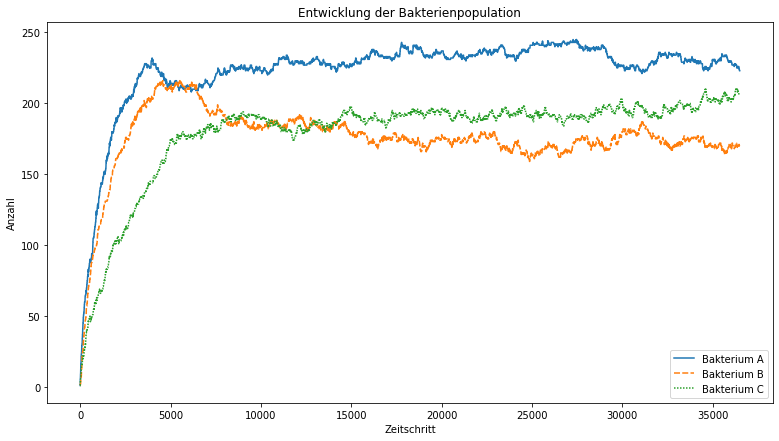

In [107]:
#Die Anlage des Lineplotts

plt.figure(figsize=(13, 7))

myplot = sns.lineplot(data=anzahl)

plt.draw()

ylabel = 'Anzahl'
xlabel = 'Zeitschritt'
title = 'Entwicklung der Bakterienpopulation'

myplot.set_ylabel(ylabel)
myplot.set_xlabel(xlabel)

myplot.set_title(title)
print()

plt.savefig("lineplot_hoheZerstörung.jpg")

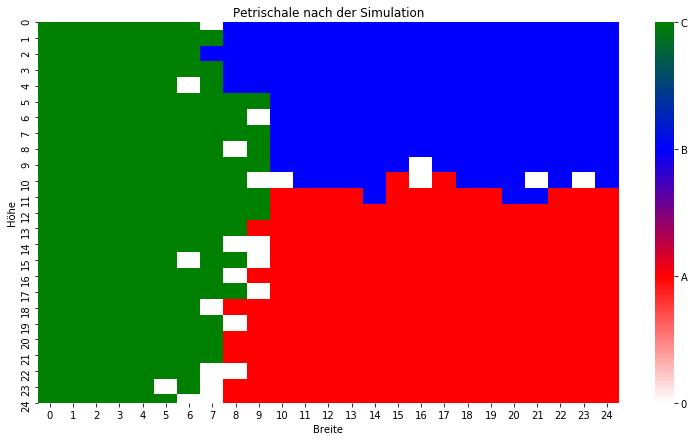

In [108]:
#Anlage der Heatmap:

#Der Rand der Petrischale wird ausgeklammert
heatmap_zellen = petrischale[1:(breite_und_hoehe-1), 1:(breite_und_hoehe-1)]

#Festlegen der zu verwendenden Farben
cmap = LinearSegmentedColormap.from_list('Custom', ['white','red','blue','green'])

plt.figure(figsize=(13, 7))

heatmap = sns.heatmap(heatmap_zellen, cmap = cmap, linecolor='lightgrey')

#Anlage der Colorbar
colorbar = heatmap.collections[0].colorbar
colorbar.set_ticks([0, 1, 2, 3])
colorbar.set_ticklabels([0,'A', 'B', 'C'])

ylabel = 'Höhe'
xlabel = 'Breite'
title = 'Petrischale nach der Simulation'

heatmap.set_ylabel(ylabel)
heatmap.set_xlabel(xlabel)
heatmap.set_title(title)

plt.savefig("heatmap_hoheZerstörung.jpg")

In [ ]:
plt.savefig("heatmap.jpg")